In [1]:
import numpy as np
import wq.core.physics.unit.au as au

from math import sqrt
from wq.core.math.ode import verlet as solver
from wq.core.physics.nbody.body3p import accelerationOf

accel = accelerationOf(au, 5.0, 3.0, 4.0)
step = solver(accel)

time = 0
x = np.array([0.0, 0.0, 0.0, 4.0, 3.0, 0.0])
v = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

cx = 4.0 * 3.0 / (5.0 + 3.0 + 4.0)
cy = 3.0 * 4.0 / (5.0 + 3.0 + 4.0)

K = 0.0
U = - au.G * (5.0 * 4.0 / 3.0 + 3.0 * 5.0 / 4.0 + 3.0 * 4.0 / 5.0)
E = K + U

def evolve(tao):
    global time, x, v, K, U, E

    time, x, v = step(time, x, v, tao)
    x1  = x[0]
    y1  = x[1]
    x2  = x[2]
    y2  = x[3]
    x3  = x[4]
    y3  = x[5]
    vx1 = v[0]
    vy1 = v[1]
    vx2 = v[2]
    vy2 = v[3]
    vx3 = v[4]
    vy3 = v[5]

    r12 = sqrt((x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2))
    r13 = sqrt((x1 - x3) * (x1 - x3) + (y1 - y3) * (y1 - y3))
    r23 = sqrt((x2 - x3) * (x2 - x3) + (y2 - y3) * (y2 - y3))

    v1 = sqrt(vx1 * vx1 + vy1 * vy1)
    v2 = sqrt(vx2 * vx2 + vy2 * vy2)
    v3 = sqrt(vx3 * vx3 + vy3 * vy3)

    K = (5.0 * (vx1 * vx1 + vy1 * vy1) + 3.0 * (vx2 * vx2 + vy2 * vy2) + 4.0 * (vx3 * vx3 + vy3 * vy3)) /2
    U = - au.G * (5.0 * 3.0 / r12 + 5.0 * 4.0 / r13 + 3.0 * 4.0 / r23)
    E = K + U

    dx = (5.0 * x1 + 3.0 * x2 + 4.0 * x3) / (5.0 + 3.0 + 4.0) - cx
    dy = (5.0 * y1 + 3.0 * y2 + 4.0 * y3) / (5.0 + 3.0 + 4.0) - cy

    x[0] = x[0] - dx
    x[1] = x[1] - dy
    x[2] = x[2] - dx
    x[3] = x[3] - dy
    x[4] = x[4] - dx
    x[5] = x[5] - dy

    return min(r12, r13, r23), max(v1, v2, v3)

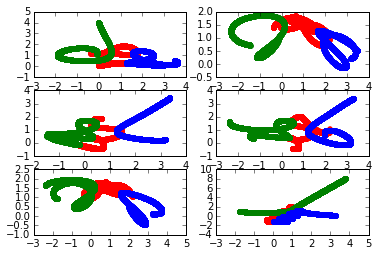

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

serial_time = [time]
serial_x1 = [0]
serial_y1 = [0]
serial_x2 = [0]
serial_y2 = [4]
serial_x3 = [3]
serial_y3 = [0]
serial_energy = [E]

dt = 0.1
for i in range(6):
    for j in range(5000):
        minDist, maxVelo = evolve(dt)
        dt = min(minDist / maxVelo / 100, 0.1)

        x1 = x[0]
        y1 = x[1]
        x2 = x[2]
        y2 = x[3]
        x3 = x[4]
        y3 = x[5]

        serial_time.append(time)
        serial_x1.append(x1)
        serial_y1.append(y1)
        serial_x2.append(x2)
        serial_y2.append(y2)
        serial_x3.append(x3)
        serial_y3.append(y3)
        serial_energy.append(E)

    plt.subplot(321+i)
    plt.scatter(serial_x1, serial_y1, facecolors='r', edgecolors='r')
    plt.scatter(serial_x2, serial_y2, facecolors='g', edgecolors='g')
    plt.scatter(serial_x3, serial_y3, facecolors='b', edgecolors='b')

    serial_time = [serial_time[-1]]
    serial_x1 = [serial_x1[-1]]
    serial_y1 = [serial_y1[-1]]
    serial_x2 = [serial_x2[-1]]
    serial_y2 = [serial_y2[-1]]
    serial_x3 = [serial_x3[-1]]
    serial_y3 = [serial_y3[-1]]
    serial_energy = [serial_energy[-1]]
        
plt.show()